# Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)
library(repr)
library(ggplot2)
library(readr)
library(broom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Dataset Description**

| | Variable | Variable Type | Description |
|---| -------- | ------- | --- |
|1| University rank  | chr  |Rank of specific university all over the world|
|2| University name | chr    |Specific name of University|
|3| Location | chr |Physical place where university exists|
|4| No. of students | chr |Present number of students enrolled in university as of 2023|
|5| No. of students per staff |dbl |Number of students under one Professor|
|6| International students |chr  |Total number of International Students|
|7| Female : male ratio |chr  |A ratio of female to male students respectively|
|8| Overall score | chr | The combined weighted scores of those given below. Out of 100|
|9| Teaching score | chr |The percieved prestige of the institution based on the Academic Reputation Survey. Out of 100.|
|10| Research score | chr |Reputation for research excellence amongst peers based on the Academic Reputation Survey. Out of 100|
|11| Citations score | chr |The number of citations received by a journal in one year to documents published in the three previous years, divided by the number of documents indexed in Scopus published in those same three years. Out of 100.|
|12| Industry income score | chr |How much money a university receives from the working industry in exchange for its academic expertise. Out of 100|
|13| International outlook score | chr |The ability of a university to attract undergraduates, postgraduates and faculty from all over the globe.|

This dataset includes 13 performance indicator measures across four areas of teaching, research, knowledge transfer and international outlook for 1,799 universities globally. The dataset includes over 680,000 data points from Times Higher Education’s survey submissions from 40,000 scholars, 121 million citations, and 15.5 million research publications at over 2,500 universities. There are 2341 observations. 

**Question**

How does the ratio of female to male students change based on university rank, location, and international student numbers?

This question can be answered using the variables of Female:male ratio, International students, University rank, and Location from the chosen dataset. Our group's question is focused on inference.

**Reading In Dataset**

In [4]:
full_uni_data <- read_csv(url("https://raw.githubusercontent.com/praj-s/stat301/main/World%20University%20Rankings%202023.csv?token=GHSAT0AAAAAACOXDJALIXBOJAWCVTHKPY4KZQ3MA6Q"))
full_uni_data

Rows: 2341 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): University Rank, Name of University, Location, International Stude...
dbl  (1): No of student per staff
num  (1): No of student

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20965,10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6
7,Princeton University,United States,8279,8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
8,"University of California, Berkeley",United States,40921,18.4,24%,52 : 48,92.1,86.4,95.8,99.0,76.8,78.4
9,Yale University,United States,13482,5.9,21%,52 : 48,91.4,92.6,92.7,97.0,55.0,70.9


**Tidying and Subsetting Relevant Data**

In [5]:
uni_data <- full_uni_data %>% 
select("University Rank", "Location", "Female:Male Ratio", "International Student") %>%
na.omit(uni_data)

colnames(uni_data) <- c("Rank", "Location", "FMRatio", "IntStu")
uni_data <- head(uni_data, 70)
uni_data

Rank,Location,FMRatio,IntStu
<chr>,<chr>,<chr>,<chr>
1,United Kingdom,48 : 52,42%
2,United States,50 : 50,25%
3,United Kingdom,47 : 53,39%
3,United States,46 : 54,24%
5,United States,40 : 60,33%
6,United States,37 : 63,34%
7,United States,46 : 54,23%
8,United States,52 : 48,24%
9,United States,52 : 48,21%


I chose to use the first 70 rows of data for the analysis. This is due to the fact that after rank 198 in the data, universities are ranked by ranges, as opposed to specific, individual values of rank. For ease of analysis and to make the analysis understandable, I decided to only use the university rankings up to row 70 of the data. Furthermore, to promote readability of graphs, and for the efficiency of the project, I reduced the number of universities to the first 101 in rank. Thus the research question would be changed to: How does the ratio of female to male students change based on university rank, location, and international student numbers in the top 101 ranked universities in the data?

**Plot Visualization Ideas**

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


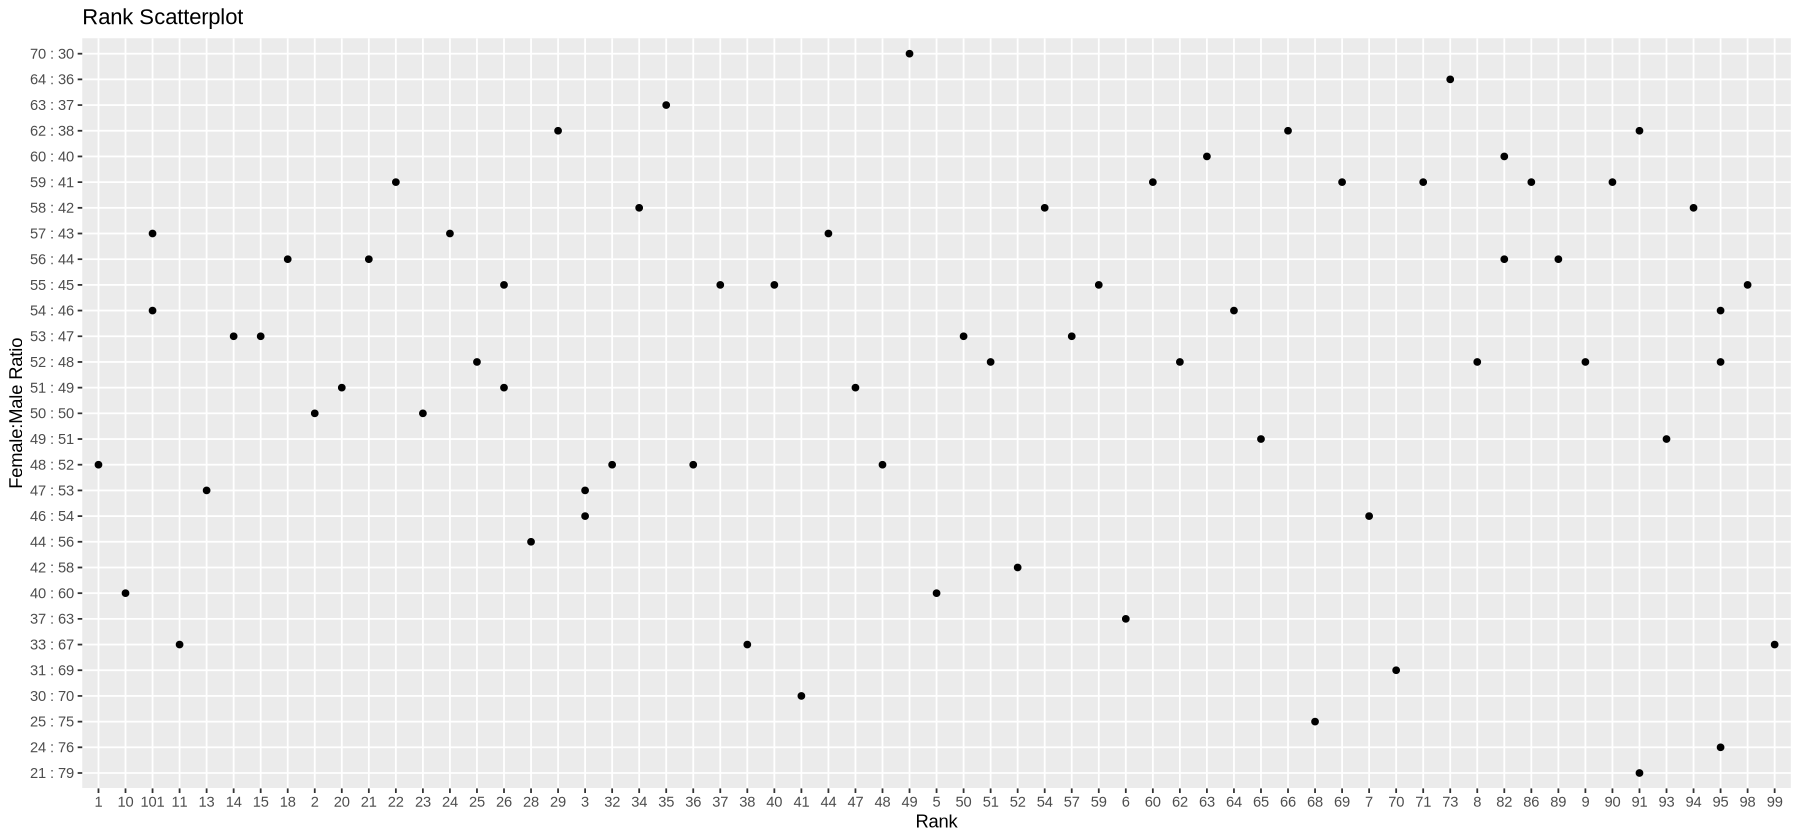

`geom_smooth()` using formula = 'y ~ x'


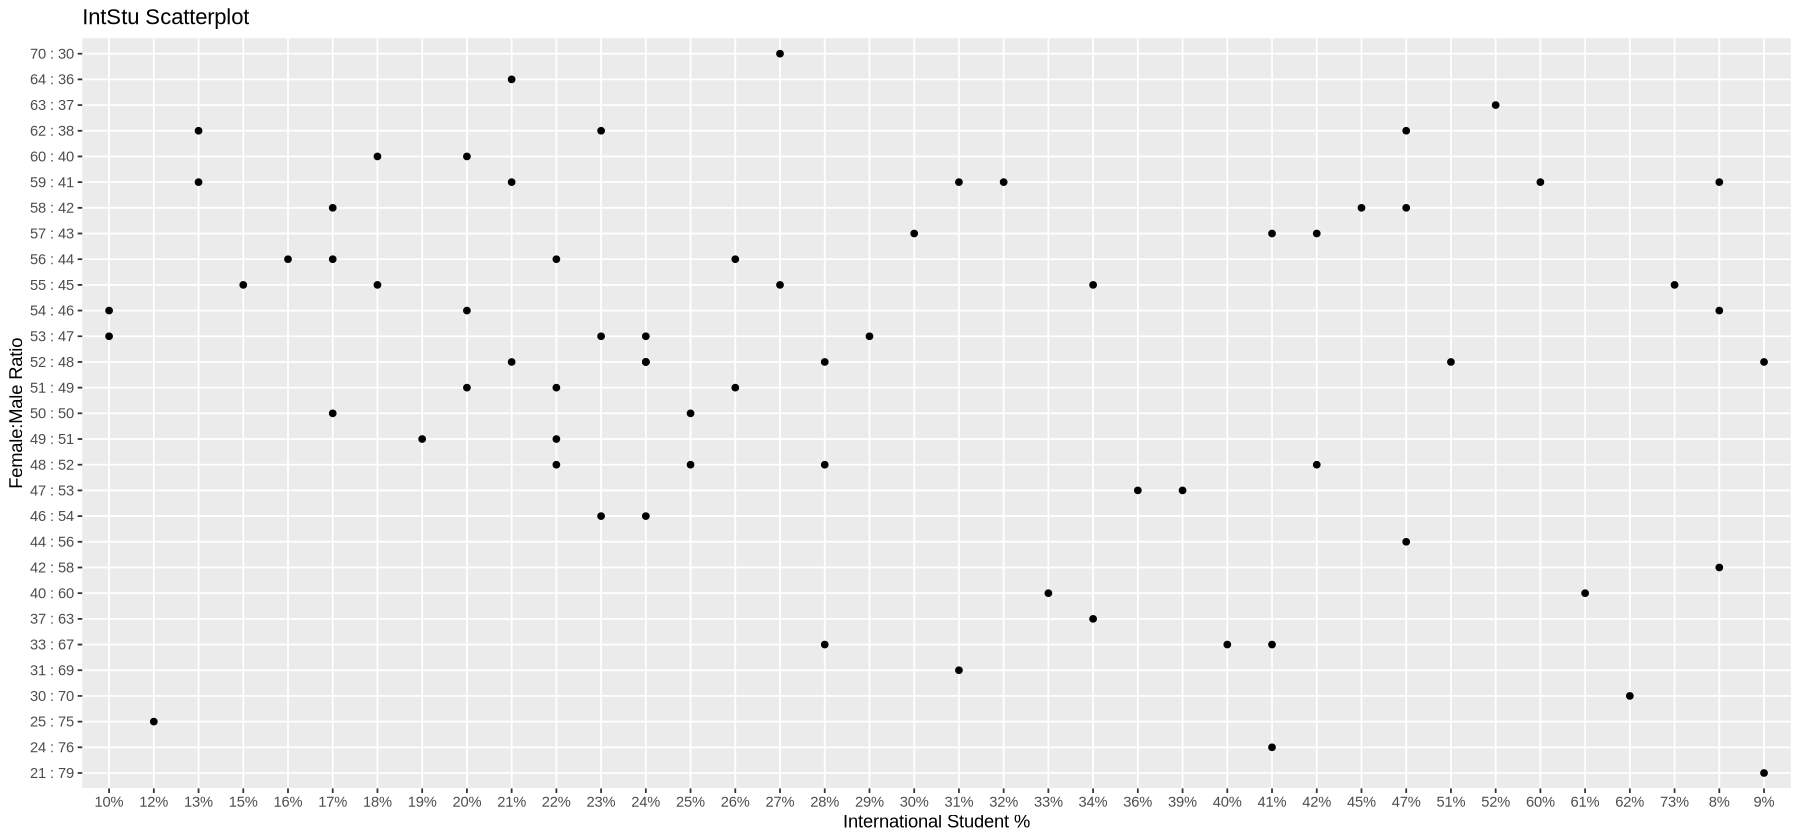

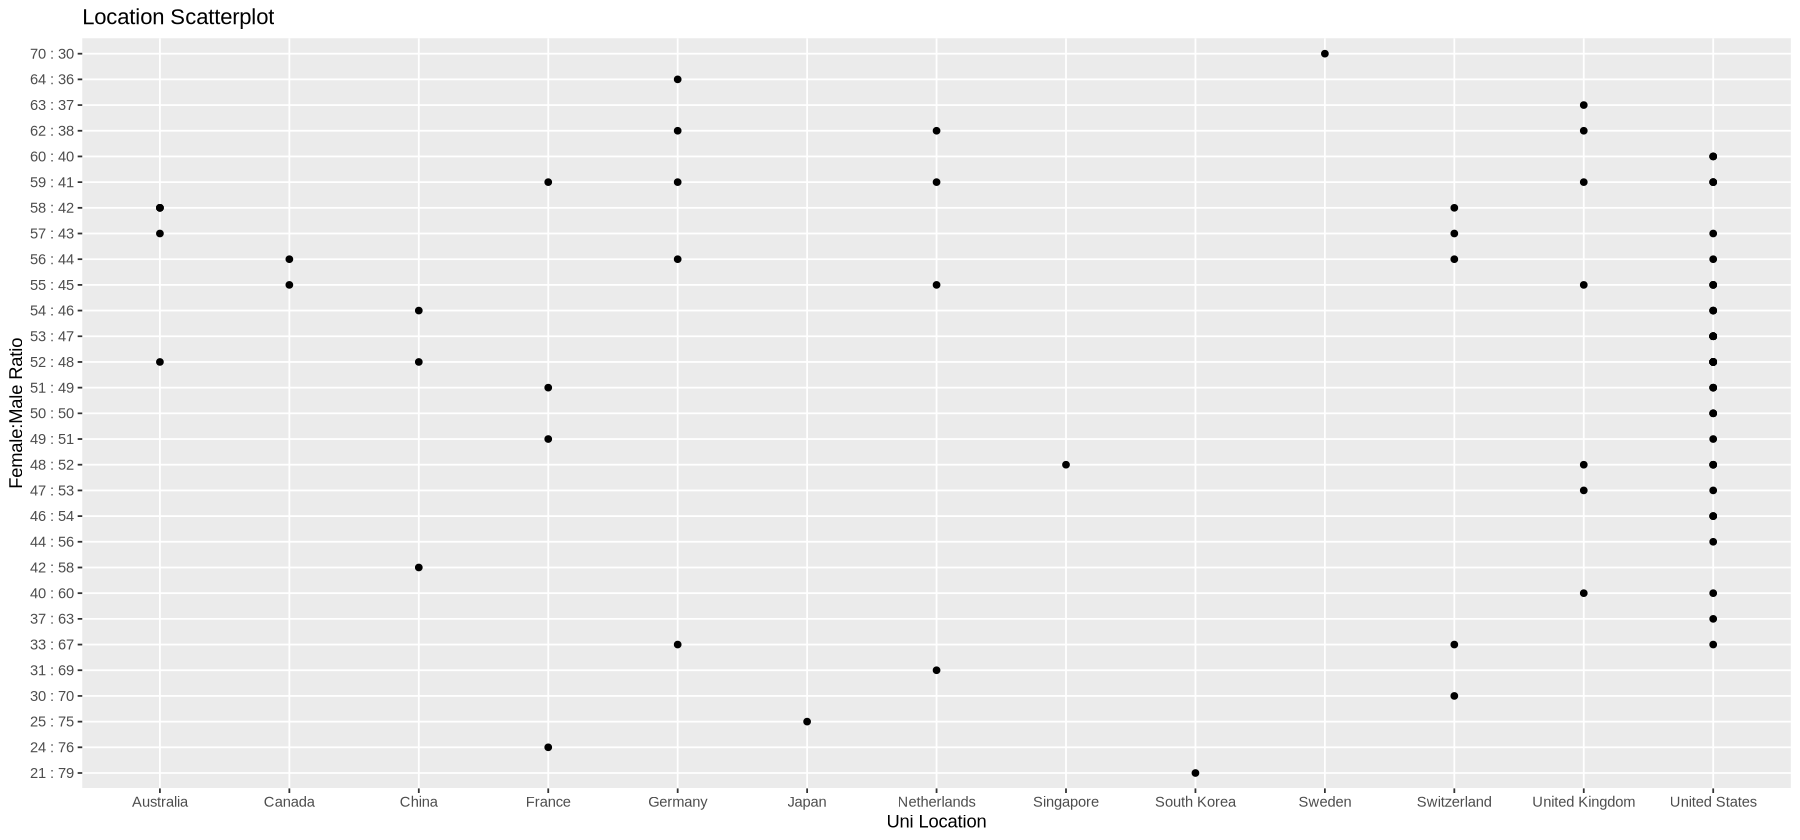

In [6]:
options(repr.plot.width = 15, repr.plot.height = 7)
rank_plot <- ggplot(uni_data, aes(x = Rank, y = FMRatio)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Rank Scatterplot",
       x = "Rank",
       y = "Female:Male Ratio")
int_plot <- ggplot(uni_data, aes(x = IntStu, y = FMRatio)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "IntStu Scatterplot",
       x = "International Student %",
       y = "Female:Male Ratio")
loc_plot <- ggplot(uni_data, aes(x = Location, y = FMRatio)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Location Scatterplot",
       x = "Uni Location",
       y = "Female:Male Ratio")

rank_plot
int_plot
loc_plot

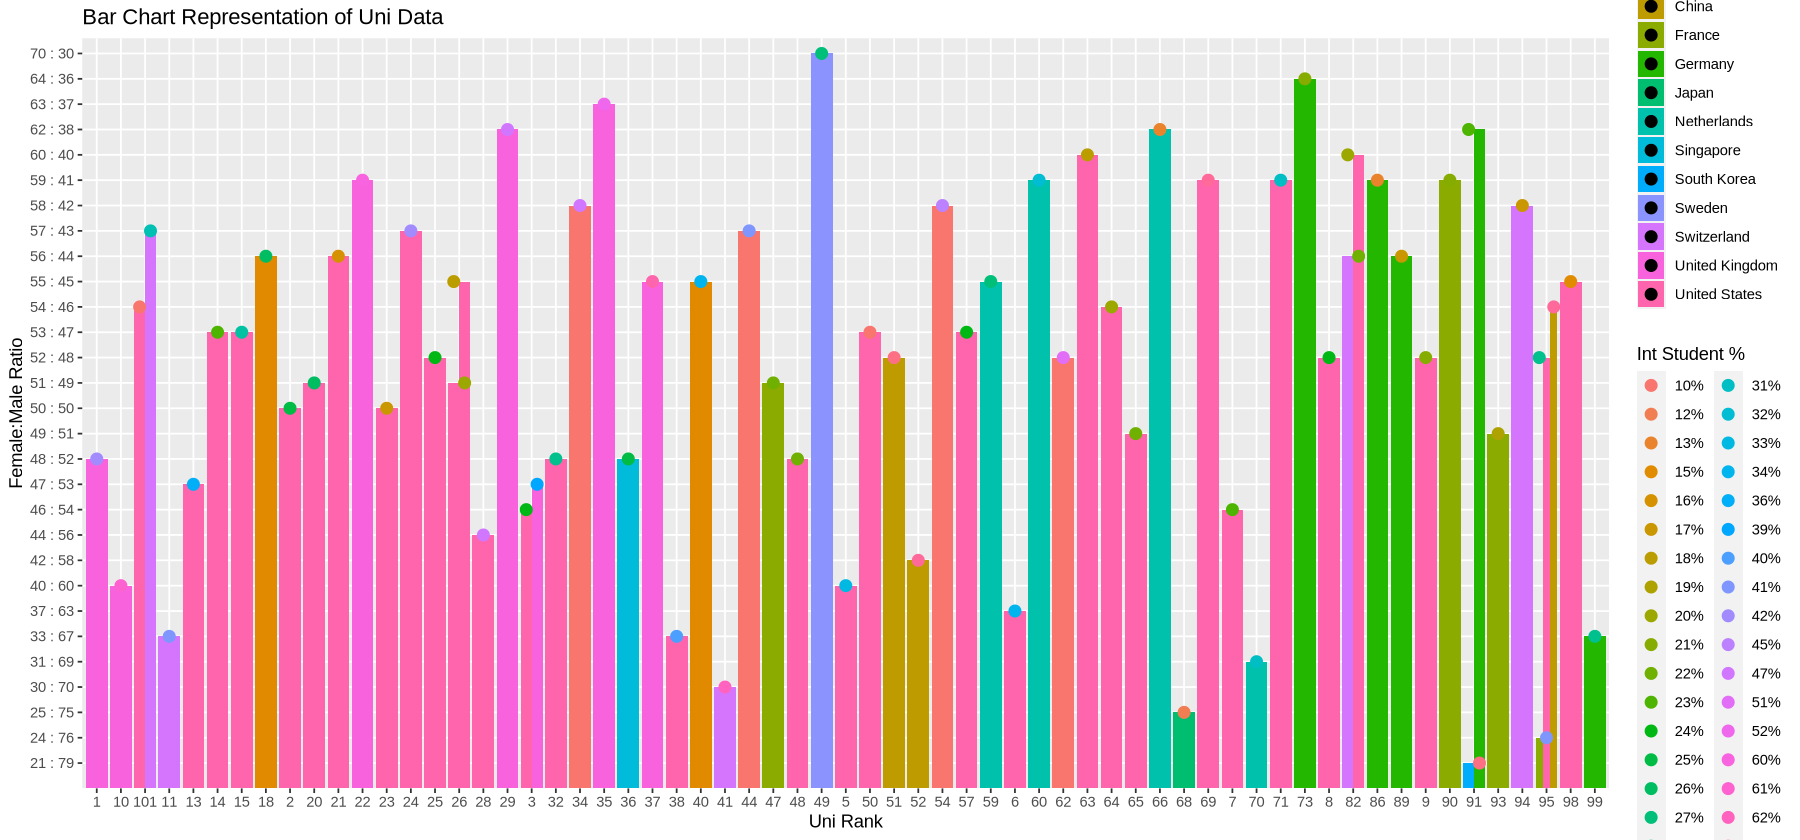

In [7]:
options(repr.plot.width = 15, repr.plot.height = 7)
full_plot <- ggplot(uni_data, aes(x = Rank, y = FMRatio, fill = Location)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_point(aes(color = IntStu), position = position_dodge(width = 0.9), size = 3, show.legend = TRUE) +
  labs(title = "Bar Chart Representation of Uni Data",
       x = "Uni Rank",
       y = "Female:Male Ratio",
       fill = "Location",
       color = "Int Student %") +
  scale_fill_discrete(name = "Location") +
  scale_color_discrete(name = "Int Student %")
full_plot

**Plot Explanations and Expectations**

There are two different graph visualizations proposed to represent the data. The first is a collection of scatterplots to individually analyze the relationship between Female:Male ratio and each predictive variable (Rank, Location, Internation Student Population). This could be effective in seeing correlations between individual variables before conducting in depth predictive analysis. On the other end, visualizing all variables in one graph can be beneficial in looking at associations between them. By visualizing the relationship between the university rank and gender ratio, including location as a variable, and layering the international percentage as points on top helps to see the data clearer and any existing associations. Since the research question highlights differences in the gender ratio as related to university rank, location, and international student populations, it would be beneficial to highlight individuals relationships between the gender ratio and each explanatory variable, but also the relationship between the gender ratio and all three explanatory variables. 

From the scatterplot graphs, one is able to see not only patterns of association between different variables, but also how many data points exists per each variable. For instance, we can see that there are the most universities in the United States as well as general gender ratio trends that exist in different universities based on rank and international populations. In the bar chart, we are easily able to see the relationships between rank and gender ratio based on location, while also being able to see the international student population. Moreover, the bar chart explicitly shows that multiple universities share a rank, but exist in different locations. Clear associations between different variables will not be visible at this preliminary stage unless hypothesis testing and predictive analysis is conducted, but these graphs are able to overtly illustrate different associations and relationships between the response variable of gender ratio and the predictor variables of rank, location, and international student population.

One limitation I struggled with while constructing visualizations was readability and ease of understanding the data, especially with many variables. Due to this concern, I reduced the number of universities used in the analysis, limiting the number of data entries in the analysis and visualizations. Furthermore, this is why the graph that uses all variables has color coding for different levels of international populations as well as location.

## Method

The method I will be using for this project is a **multi-linear regression (MLR)**. This is appropriate for the research question I have proposed since the model is primarily used to analyze relationships between multiple independent variables and one dependent variable. In my question, I analyze the relationship between location, rank, and international student percentage with the dependent variable of female to male ratio. To apply my chosen method, one must assume that there is linearity in the data, the variables are independent of each other, variance has to remain constance between variables, and there needs to be normality. Though there are lots of benefits to using this method, there are also weaknesses. For example, the model could overfit the data and leave no room for generalizing new data. Furthermore, using this method could also result in multicollinearity, where multiple independent variables end up being correlated. However by using MLR I will be able to account for multiple independent variables and their effects on the dependent variable while reducing the likelihood of bias and error in the estimations.

## Implementation of a proposed model

In [8]:
convert_ratio_to_decimal <- function(ratio_str) {
  parts <- strsplit(ratio_str, ":")[[1]]
  return(as.numeric(parts[1]) / as.numeric(parts[2]))
} # function for converting ratios to decimal values

In [9]:
uni_data$FMRatio <- 
sapply(uni_data$FMRatio, convert_ratio_to_decimal) # applying function to FMRatio col for calculations

In [10]:
all_MLR <- 
    lm(FMRatio ~ ., data = uni_data)
summary(all_MLR)


Call:
lm(formula = FMRatio ~ ., data = uni_data)

Residuals:
ALL 70 residuals are 0: no residual degrees of freedom!

Coefficients: (42 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)             0.888136        NaN     NaN      NaN
Rank10                 -0.256410        NaN     NaN      NaN
Rank101                 0.285777        NaN     NaN      NaN
Rank11                 -0.547267        NaN     NaN      NaN
Rank13                 -0.001344        NaN     NaN      NaN
Rank14                  0.239523        NaN     NaN      NaN
Rank15                  0.239523        NaN     NaN      NaN
Rank18                  0.384591        NaN     NaN      NaN
Rank2                   0.111864        NaN     NaN      NaN
Rank20                  0.152680        NaN     NaN      NaN
Rank21                  0.384591        NaN     NaN      NaN
Rank22                  0.515947        NaN     NaN      NaN
Rank23                  0.111864

In [14]:
all_MLR_results <- tidy(all_MLR)
all_MLR_results

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.888136322,NaN,NaN,NaN
Rank10,-0.256410256,NaN,NaN,NaN
Rank101,0.285776721,NaN,NaN,NaN
Rank11,-0.547267361,NaN,NaN,NaN
Rank13,-0.001343869,NaN,NaN,NaN
Rank14,0.239523252,NaN,NaN,NaN
Rank15,0.239523252,NaN,NaN,NaN
Rank18,0.384590951,NaN,NaN,NaN
Rank2,0.111863678,NaN,NaN,NaN


**Response to the Analysis**

Based on the MLR results from the table, there are some unexpected results from the model. The occurence of a 0 degree of freedom and an R-squared of 1, paired with the NaN and NAs in the table can indicate an overfit of the model. To address the issues encountered, we would have to run inividual linear regressions for each predictor (Rank, IntStu, and Location) and the response variable (FMRatio) to find individual correlations and relationships. Additionally, we could increase the amount of data in the sample to reduce the likelihood of overfitting the model by compensating for the increased number of predictive variables with an increased amount of data.